In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import warnings


In [ ]:
df = pd.read_csv('ml.csv')
df


Basic Information about the Dataset:
Number of rows: 1000
Number of columns: 8


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
x = df.drop(columns=['math score'])
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cat_cols:
    print(f"Categories in '{col}' variable: {df[col].unique()}")

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [ ]:
print("Categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end = " ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [ ]:
num_cols = x.select_dtypes(exclude=['object']).columns
print("Numerical columns in the dataset: ", num_cols.tolist())

cat_cols = x.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset: ", cat_cols.tolist())

Numerical columns in the dataset:  ['reading score', 'writing score']
Categorical columns in the dataset:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans = StandardScaler()
oh_tran = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("onehot", oh_tran, cat_cols),
        ("scaler", num_trans, num_cols)
    ]
)

X = preprocessor.fit_transform(x)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [ ]:
X.shape

(1000, 19)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #Separating the data into training and testing sets

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    return mse, rmse, r2, mae

mse, rmse, r2, mae = evaluate_model(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Mean Squared Error: 29.10
Root Mean Squared Error: 5.39
R-squared: 0.88
Mean Absolute Error: 4.21


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    model_train_mae = mean_absolute_error(y_train, y_train_pred)
    model_train_r2 = r2_score(y_train, y_train_pred)

    model_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    model_test_mae = mean_absolute_error(y_test, y_test_pred)
    model_test_r2 = r2_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Nearest Neighbors
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
---

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)


,Model Name,R2_Score
2,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest,0.853568
6,AdaBoost,0.847057
1,Lasso Regression,0.825320
3,K-Nearest Neighbors,0.783813
4,Decision Tree,0.749711


In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

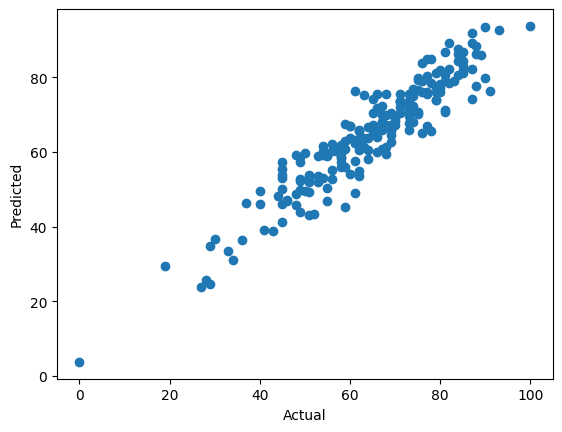

In [ ]:
# Plot y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

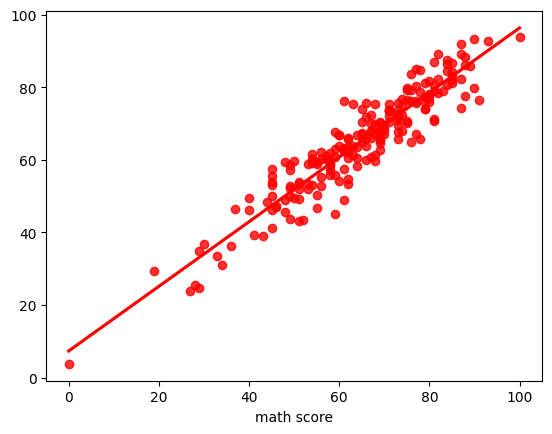

In [ ]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='red')

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


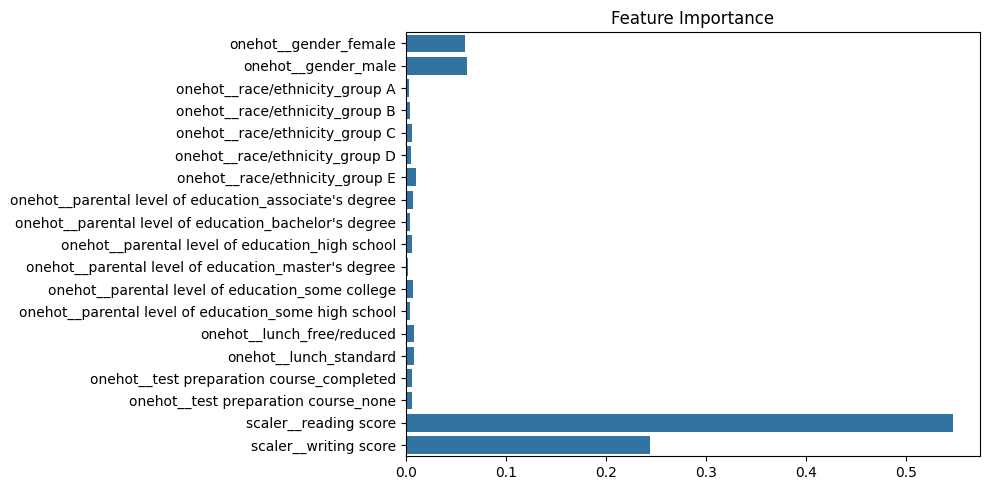

In [ ]:
# Feature importance plot for Random Forest (or any tree-based model)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

feature_names = preprocessor.get_feature_names_out()
importances = rf_model.feature_importances_

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
#Cross Validation for Stability
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

rf_pipe = make_pipeline(preprocessor, RandomForestRegressor())

cv_scores = cross_val_score(rf_pipe, x, y, cv=5, scoring='r2')
print("Cross-Validated R² Score: ", np.mean(cv_scores))

Cross-Validated R² Score:  0.8367500424702374


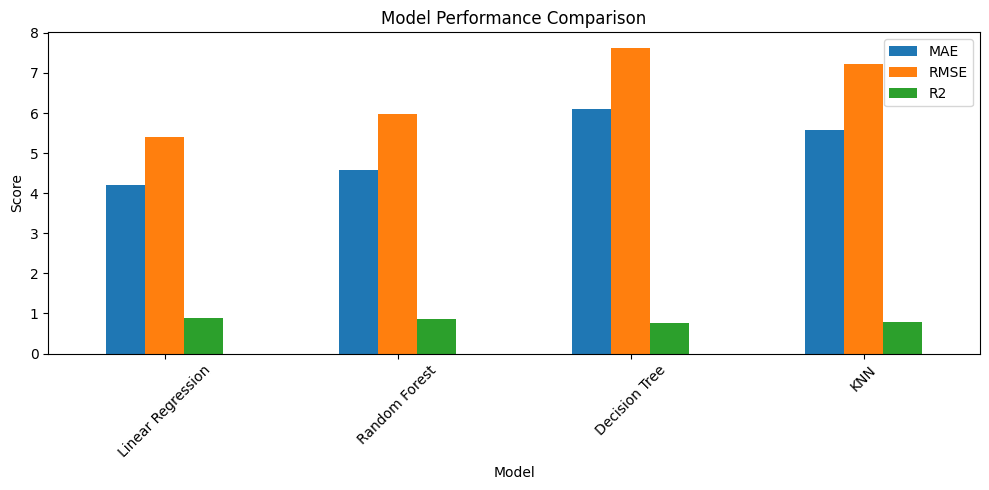

In [ ]:
#Model Comparison Chart
from sklearn.pipeline import Pipeline
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)

results_df.set_index('Model')[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()